<a href="https://colab.research.google.com/github/BSM-16/Image-Classifier-using-CNN/blob/main/image_classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/sample_data/train images/rps-cv-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/train images')
zip_ref.close()

In [19]:
base_dir = '/content/rps-cv-images'
train_dir = os.path.join(base_dir, 'rock+paper+scissors')
validation_dir = os.path.join(base_dir, 'rock+paper+scissors')

In [27]:
 train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range=20,
  horizontal_flip=True,
  shear_range = 0.2,
  fill_mode = 'nearest',
  validation_split=0.2

    )

In [28]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),  
        shuffle=True,
        subset='training')
     
validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150), 
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [31]:
model.fit(train_generator,
          steps_per_epoch=16,
          epochs=15,
          validation_data=validation_generator,
          validation_steps=4,
          verbose=2)

Epoch 1/15
16/16 - 16s - loss: 1.1294 - accuracy: 0.3340 - val_loss: 1.1283 - val_accuracy: 0.2578
Epoch 2/15
16/16 - 15s - loss: 1.0863 - accuracy: 0.4023 - val_loss: 1.0434 - val_accuracy: 0.6719
Epoch 3/15
16/16 - 15s - loss: 0.9084 - accuracy: 0.6074 - val_loss: 0.6832 - val_accuracy: 0.8125
Epoch 4/15
16/16 - 15s - loss: 0.5964 - accuracy: 0.7873 - val_loss: 0.4431 - val_accuracy: 0.8672
Epoch 5/15
16/16 - 15s - loss: 0.4244 - accuracy: 0.8359 - val_loss: 0.3449 - val_accuracy: 0.8672
Epoch 6/15
16/16 - 15s - loss: 0.2710 - accuracy: 0.9245 - val_loss: 0.1494 - val_accuracy: 0.9297
Epoch 7/15
16/16 - 15s - loss: 0.1997 - accuracy: 0.9344 - val_loss: 0.2999 - val_accuracy: 0.8906
Epoch 8/15
16/16 - 15s - loss: 0.2262 - accuracy: 0.9199 - val_loss: 0.1886 - val_accuracy: 0.9609
Epoch 9/15
16/16 - 16s - loss: 0.2266 - accuracy: 0.9165 - val_loss: 0.1202 - val_accuracy: 0.9688
Epoch 10/15
16/16 - 15s - loss: 0.1818 - accuracy: 0.9336 - val_loss: 0.2771 - val_accuracy: 0.8984
Epoch 11/

Saving 7ZGsbIMypDIEZxR0.png to 7ZGsbIMypDIEZxR0.png
7ZGsbIMypDIEZxR0.png
paper


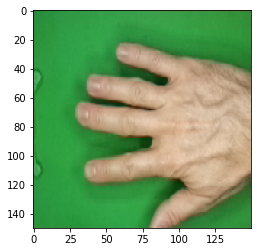

In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
      
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('others')